In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
from math import sin, cos, sqrt, atan2, radians
import random
import statsmodels.api as sm
import csv
import sklearn
import pandas as pd
import numpy as np
from __future__ import division
import collections
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from sklearn.cross_validation import cross_val_score
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
import scipy
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import urllib

In [77]:
mm_data = pd.read_csv('2017DataforChartV2.csv')

In [78]:
mm_data.columns

Index(['game_id', 'Season', 'result', 'starplayer_difference',
       'rpi_rating_difference', 'Log5', 'adjoe_difference', 'adjde_difference',
       'EFG-OEEG', 'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif'],
      dtype='object')

In [79]:
categories=[ 'starplayer_difference',
       'rpi_rating_difference', 'Log5', 'adjoe_difference', 'adjde_difference',
       'EFG-OEEG', 'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif']

In [80]:
def normalizeInput(arr):
    for i in range(arr.shape[1]):
        minVal = min(arr[:,i])
        maxVal = max(arr[:,i])
        arr[:,i] =  (arr[:,i] - minVal) / (maxVal - minVal)
    return arr

In [81]:
mm_data['team1_win'] = mm_data['result']

In [82]:
def shuffle(df):     
    df = df.reindex(np.random.permutation(df.index)).copy()
    return df.reset_index(drop=True)

In [83]:
mm_data = shuffle(mm_data)

In [84]:
my_randoms = random.sample(range(len(mm_data)), len(mm_data)//2)

In [85]:
mm_data[(~mm_data.index.isin(my_randoms))&(mm_data.Season==2010)].shape

(33, 17)

In [86]:
mm_data_1 = mm_data[~mm_data.index.isin(my_randoms)][['game_id', 'Season', 'result', 'starplayer_difference',
       'rpi_rating_difference', 'Log5', 'adjoe_difference', 'adjde_difference',
       'EFG-OEEG', 'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif', 'team1_win']].reset_index(drop=True)
mm_data_2 = mm_data[mm_data.index.isin(my_randoms)][['game_id', 'Season', 'result', 'starplayer_difference',
       'rpi_rating_difference', 'Log5', 'adjoe_difference', 'adjde_difference',
       'EFG-OEEG', 'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif','team1_win']].reset_index(drop=True)

In [87]:
mm_data_2['team1_win'] = mm_data_2['team1_win'].apply(lambda x: 1 if x==0 else 0)
#mm_data_2['dif_distance'] = mm_data_2['dif_distance']*-1
mm_data_2['Log5'] = 1-mm_data_2['Log5']
mm_data_2['starplayer_difference'] = mm_data_2['starplayer_difference']*-1
mm_data_2['adjoe_difference'] = mm_data_2['adjoe_difference']*-1
mm_data_2['adjde_difference'] = mm_data_2['adjde_difference']*-1
#mm_data['seed_difference'] = mm_data['seed_difference']*-1
mm_data_2['EFG-OEEG'] = mm_data_2['EFG-OEEG']*-1
mm_data_2['TPP-DTPP_difference'] = mm_data_2['TPP-DTPP_difference']*-1
#mm_data_2['MOV_differerence'] = mm_data_2['MOV_differerence']*-1
mm_data_2['SRS_difference'] = mm_data_2['SRS_difference']*-1
mm_data_2['SOS_difference'] = mm_data_2['SOS_difference']*-1
mm_data_2['adjwin_difference'] = mm_data_2['adjwin_difference']*-1
mm_data_2['coach_influence_difference'] = mm_data_2['coach_influence_difference']*-1
mm_data_2['Hostwin_difference'] = mm_data_2['Hostwin_difference']*-1
#mm_data_2['coach_influence_differenceV2'] = mm_data_2['coach_influence_differenceV2']*-1

mm_data_2.columns = ['game_id', 'Season', 'result', 'starplayer_difference',
       'rpi_rating_difference', 'Log5', 'adjoe_difference', 'adjde_difference',
       'EFG-OEEG', 'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif', 'team1_win']



In [88]:
mm_train = pd.concat([mm_data_2, mm_data_1])

In [89]:
allWins = mm_train[mm_train['team1_win'] == 1]

In [90]:
#plt.hist(allWins['MOV_differerence'], 100)

In [91]:
for cat in categories:
    print ('The mean of category', cat, ': ',(allWins[cat]).mean())

The mean of category starplayer_difference :  0.10091743119266056
The mean of category rpi_rating_difference :  0.00043719549541284115
The mean of category Log5 :  0.6437692512036703
The mean of category adjoe_difference :  3.4907412844036685
The mean of category adjde_difference :  2.8117220183486236
The mean of category EFG-OEEG :  1.6384002272477054
The mean of category TPP-DTPP_difference :  0.0045354503559633
The mean of category SRS_difference :  6.4010825688073405
The mean of category SOS_difference :  3.3660183486238537
The mean of category adjwin_difference :  0.05676109144954129
The mean of category Hostwin_difference :  0.1261069867981653
The mean of category coach_influence_difference :  29.829358552610984
The mean of category previous_performance_dif :  2.7211009174311926


In [92]:
import scipy
for cat in categories:
    print ('The Pearson correlation between the result and', cat, 
           'is :',scipy.stats.pearsonr(mm_train[cat], mm_train['team1_win']))

The Pearson correlation between the result and starplayer_difference is : (0.2173021581460485, 1.3646999766759487e-12)
The Pearson correlation between the result and rpi_rating_difference is : (0.0059305825561498807, 0.84843216006513333)
The Pearson correlation between the result and Log5 is : (0.52113682186163379, 1.5196032846228017e-73)
The Pearson correlation between the result and adjoe_difference is : (0.4098274501726194, 1.9687695466263599e-43)
The Pearson correlation between the result and adjde_difference is : (0.3814724822196725, 2.1303711750736102e-37)
The Pearson correlation between the result and EFG-OEEG is : (0.30817687534896687, 2.4350640726692416e-24)
The Pearson correlation between the result and TPP-DTPP_difference is : (0.1404371840414079, 5.4092786473404998e-06)
The Pearson correlation between the result and SRS_difference is : (0.5434435926006953, 4.8495021621695904e-81)
The Pearson correlation between the result and SOS_difference is : (0.47253017728714053, 5.1129

In [93]:
normalize = mm_train.drop(['game_id', 'Season','result','team1_win'],axis=1)

In [94]:
normalize = sklearn.preprocessing.scale(normalize)

In [95]:
normalize

array([[ 2.00291294,  0.52398448,  1.51185687, ...,  0.34156308,
        -0.14860068,  0.55632288],
       [ 0.0057555 ,  0.0914626 ,  0.77490825, ...,  1.20607139,
         0.09115922,  0.0052126 ],
       [-1.99140195,  0.63681627,  0.17651117, ...,  0.23349954,
        -0.41222064,  0.17478499],
       ..., 
       [ 0.0057555 , -0.98043943, -0.95187746, ...,  1.04397608,
        -0.13527801,  0.07586776],
       [ 0.0057555 , -2.29681035, -0.66016224, ..., -0.67423419,
        -1.73732918, -1.1535321 ],
       [-1.99140195, -0.13420098, -0.61778905, ..., -0.47971982,
        -0.27772688,  0.21717809]])

In [96]:
for cat in categories:
    print ('The mean of category', cat, ': ',(allWins[cat]).mean())

The mean of category starplayer_difference :  0.10091743119266056
The mean of category rpi_rating_difference :  0.00043719549541284115
The mean of category Log5 :  0.6437692512036703
The mean of category adjoe_difference :  3.4907412844036685
The mean of category adjde_difference :  2.8117220183486236
The mean of category EFG-OEEG :  1.6384002272477054
The mean of category TPP-DTPP_difference :  0.0045354503559633
The mean of category SRS_difference :  6.4010825688073405
The mean of category SOS_difference :  3.3660183486238537
The mean of category adjwin_difference :  0.05676109144954129
The mean of category Hostwin_difference :  0.1261069867981653
The mean of category coach_influence_difference :  29.829358552610984
The mean of category previous_performance_dif :  2.7211009174311926


In [97]:
model4 = RandomForestClassifier(n_estimators=200)
model2 = linear_model.BayesianRidge()
model5 = AdaBoostClassifier(n_estimators=100)
model = GradientBoostingRegressor(n_estimators=100)
model3 = KNeighborsClassifier(n_neighbors=101)

In [98]:
def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort_index
    fx_imp.plot(kind='barh')

In [99]:
np_data_X = mm_train.drop(['game_id', 'Season','result','team1_win'],axis=1)

In [100]:
np_data_X.columns

Index(['starplayer_difference', 'rpi_rating_difference', 'Log5',
       'adjoe_difference', 'adjde_difference', 'EFG-OEEG',
       'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       'adjwin_difference', 'Hostwin_difference', 'coach_influence_difference',
       'previous_performance_dif'],
      dtype='object')

In [101]:
np_data_X = np.array(np_data_X)

In [102]:
np_data_X[0]

array([  1.00000000e+00,   2.80000000e-02,   9.09963484e-01,
         7.92000000e-01,   1.39894000e+01,   9.75666855e+00,
         1.62000000e-02,   9.82000000e+00,  -4.36000000e+00,
         3.11814672e-01,   1.11111111e-01,  -8.56752237e+00,
         3.90000000e+01])

In [103]:
np_data_X.shape

(1041, 13)

In [104]:
np_data_Y = mm_train['team1_win']

In [105]:
np_data_Y = np.array(np_data_Y)

In [106]:
categories=[ 'starplayer_difference', 
            'team1_rankdifference',
        'team2_rank_difference', 'team1_rpi_rating', 
            'team2_rpi_rating',
       'team1_seed', 'team2_seed', 'team1_adjoe', 'team1_adjde', 
            'team2_adjoe',
       'team2_adjde', 'Log5', 'adjoe_difference', 'adjde_difference', 
       'team1_EFP-OEFG', 'team2_EFG-OEFG', 'EFG-OEEG', 
            'team1_TPP-DTPP',
       'team2_TPP-OTPP', 'TPP-DTPP_difference', 'team1_MOV', 
            'team1_SOS_x',
       'team1_SRS_x', 'team2_MOV', 'MOV_differerence', 'team2_SOS_x',
       'team2_SRS_x', 'SRS_difference', 'SOS_difference', 
            'team2_adjwin',
       'team2_hostwin', 'team1_adjwin', 'adjwin_difference', 
            'team1_hostwin',
       'Hostwin_difference', 'tm1_coach_influence', 
            'tm2_coach_influence',]
accuracy=[]
totals=[]
for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(np_data_X, np_data_Y)
    results1 = model.fit(X_train, Y_train)
    preds1 = model.predict(X_test)
    
    results2 = model2.fit(X_train, Y_train)
    preds2 = model2.predict(X_test)
    
    results3 = model3.fit(X_train, Y_train)
    preds3 = model3.predict(X_test)

    results4 = model4.fit(X_train, Y_train)
    preds4 = model4.predict(X_test)
    
    results5 = model5.fit(X_train, Y_train)
    preds5 = model5.predict(X_test)
    
    preds = (preds1 + preds2 + preds3 + preds4 + preds5)/5
    totals.append(preds)
    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == Y_test))
    #accuracy.append(np.mean(predictions == Y_test))
print ("The accuracy is", sum(accuracy)/len(accuracy))


The accuracy is 0.773946360153


In [107]:
categories=[ 'starplayer_difference', 
            'team1_rankdifference',
        'team2_rank_difference', 'team1_rpi_rating', 
            'team2_rpi_rating',
       'team1_seed', 'team2_seed', 'team1_adjoe', 'team1_adjde', 
            'team2_adjoe',
       'team2_adjde', 'Log5', 'adjoe_difference', 'adjde_difference', 
       'team1_EFP-OEFG', 'team2_EFG-OEFG', 'EFG-OEEG', 
            'team1_TPP-DTPP',
       'team2_TPP-OTPP', 'TPP-DTPP_difference', 'team1_MOV', 
            'team1_SOS_x',
       'team1_SRS_x', 'team2_MOV', 'MOV_differerence', 'team2_SOS_x',
       'team2_SRS_x', 'SRS_difference', 'SOS_difference', 
            'team2_adjwin',
       'team2_hostwin', 'team1_adjwin', 'adjwin_difference', 
            'team1_hostwin',
       'Hostwin_difference', 'tm1_coach_influence', 
            'tm2_coach_influence',
       'coach_influence_difference']
np.random.choice(categories,5, replace=False)

array(['team2_adjde', 'team2_rank_difference', 'team1_TPP-DTPP',
       'team1_adjwin', 'Log5'],
      dtype='<U26')

In [108]:
realCategories = ['Wins','PPG','PPGA','PowerConf','3PG', 'APG', 'Conference Champ', 'Tourney Conference Champ',
            'Seed','SOS','SRS', 'Rebounds', 'Steals', 'Tourney Appearances','National Championships','Location']

In [109]:
mm_data_2017 = mm_train[(mm_train['Season'] >= 2015)].reset_index(drop=True)
mm_data_else =  mm_train[mm_train['Season'] < 2015].reset_index(drop=True)

In [110]:
mm_data_else.groupby('team1_win')['Log5'].mean()

team1_win
0    0.371325
1    0.639464
Name: Log5, dtype: float64

In [111]:
scaler = StandardScaler()
mm_train_scaled = scaler.fit_transform(mm_data_else[['Log5']])
logit = LogisticRegression()
logit.fit(mm_train_scaled, mm_data_else['team1_win'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
smlogit = sm.Logit(mm_data_else['team1_win'], mm_data_else['Log5']).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.656035
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  844
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                            0
Date:                Wed, 01 Aug 2018   Pseudo R-squ.:                 0.05243
Time:                        08:39:51   Log-Likelihood:                -553.69
converged:                       True   LL-Null:                       -584.33
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Log5           0.9826      0.128      7.662      0.000       0.731       1.234
==============================================================================
"""

In [113]:
mm_data_2017['preds'] = logit.predict_proba(scaler.fit_transform(mm_data_2017[['Log5']]))[:,1]

In [114]:
mm_data_2017['preds'].head()

0    0.735033
1    0.570591
2    0.130343
3    0.719711
4    0.109171
Name: preds, dtype: float64

In [115]:
mm_data_2017['prediction'] = logit.predict(scaler.fit_transform(mm_data_2017[['Log5']]))

In [116]:
mm_data_2017['prediction'].head()

0    1
1    1
2    0
3    1
4    0
Name: prediction, dtype: int64

In [117]:
mm_data_2017[['team1_win','preds','prediction']].head()

,team1_win,preds,prediction
0,1,0.735033,1
1,0,0.570591,1
2,0,0.130343,0
3,0,0.719711,1
4,0,0.109171,0


In [118]:
mm_data_2017.groupby('team1_win')['preds'].mean()

team1_win
0    0.371549
1    0.649797
Name: preds, dtype: float64

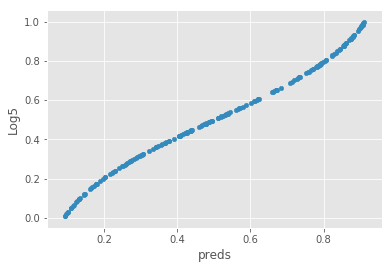

In [119]:
mm_data_2017.plot(kind='scatter', x='preds',y='Log5')

In [120]:
confusion_matrix(mm_data_2017['team1_win'], mm_data_2017['prediction'])

array([[68, 23],
       [31, 75]], dtype=int64)

In [121]:
accuracy_score(mm_data_2017['team1_win'], mm_data_2017['prediction'],)

0.7258883248730964

In [122]:
precision_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.76530612244897955

In [123]:
recall_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.70754716981132071

In [124]:
f1_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.73529411764705888

In [125]:
log_loss(mm_data_2017['team1_win'].values, mm_data_2017['preds'].values)

0.52717609623604977

In [126]:
scaler = StandardScaler()
mm_train_scaled = scaler.fit_transform(mm_data_else[['starplayer_difference', 
       'Log5', 'adjoe_difference', 'adjde_difference', 
        'EFG-OEEG', 'TPP-DTPP_difference',
        'SRS_difference', 'SOS_difference', 'adjwin_difference', 
       'Hostwin_difference']])
logit = LogisticRegression()
logit.fit(mm_train_scaled, mm_data_else['team1_win'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
smlogit = sm.Logit(mm_data_else['team1_win'], mm_data_else[['starplayer_difference', 
       'Log5', 'adjoe_difference', 'adjde_difference', 
        'EFG-OEEG', 'TPP-DTPP_difference', 
        'SRS_difference', 'SOS_difference', 'adjwin_difference', 
       'Hostwin_difference']]).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.417297
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  844
Model:                          Logit   Df Residuals:                      834
Method:                           MLE   Df Model:                            9
Date:                Wed, 01 Aug 2018   Pseudo R-squ.:                  0.3973
Time:                        08:40:09   Log-Likelihood:                -352.20
converged:                       True   LL-Null:                       -584.33
                                        LLR p-value:                 2.553e-94
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
starplayer_difference     0.5913      0.211      2.798      0.005       0.177       1.005
Log5                      0.1154      0.188      0.614      0.539      -0.253       0.483
adjoe_difference         -0.1252      0.037     -3.412      0.001      -0.197      -0.053
adjde_difference         -0.1211      0.039     -3.072      0.002      -0.198      -0.044
EFG-OEEG                  0.0727      0.034      2.125      0.034       0.006       0.140
TPP-DTPP_difference       5.1016      3.845      1.327      0.185      -2.435      12.638
SRS_difference            0.0321      0.045      0.715      0.475      -0.056       0.120
SOS_difference            0.3465      0.053      6.529      0.000       0.242       0.450
adjwin_difference         7.4764      1.361      5.491      0.000       4.808      10.145
Hostwin_difference        4.0313      0.548      7.357      0.000       2.957       5.105
=========================================================================================
"""

In [128]:
#mm_data_2018 = pd.read_csv('2018Selected.csv')

In [129]:
#mm_data_2018.describe()

In [130]:
#mm_data_2018['preds'] = logit.predict_proba(scaler.fit_transform(mm_data_2018[['starplayer_difference', 
#       'Log5', 'adjoe_difference', 'adjde_difference', 
#        'EFG-OEEG', 'TPP-DTPP_difference', 'MOV_differerence',
#        'SRS_difference', 'SOS_difference', 'adjwin_difference', 
#       'Hostwin_difference']]))[:,1]

In [131]:
mm_data_2017['preds'] = logit.predict_proba(scaler.fit_transform(mm_data_2017[['starplayer_difference', 
       'Log5', 'adjoe_difference', 'adjde_difference', 
        'EFG-OEEG', 'TPP-DTPP_difference', 
        'SRS_difference', 'SOS_difference', 'adjwin_difference', 
       'Hostwin_difference']]))[:,1]

In [132]:
mm_data_2017['preds'].head()

0    0.899855
1    0.169064
2    0.058391
3    0.422919
4    0.020023
Name: preds, dtype: float64

In [133]:
#mm_data_2018.to_csv('2018Prediction.csv')

In [134]:
mm_data_2017['prediction'] = logit.predict(scaler.fit_transform(mm_data_2017[['starplayer_difference', 
       'Log5', 'adjoe_difference', 'adjde_difference', 
        'EFG-OEEG', 'TPP-DTPP_difference', 
        'SRS_difference', 'SOS_difference', 'adjwin_difference', 
       'Hostwin_difference']]))

In [135]:
mm_data_2017[['team1_win','preds','prediction']].head()

,team1_win,preds,prediction
0,1,0.899855,1
1,0,0.169064,0
2,0,0.058391,0
3,0,0.422919,0
4,0,0.020023,0


In [136]:
accuracy_score(mm_data_2017['team1_win'], mm_data_2017['prediction'],)

0.79695431472081213

In [137]:
precision_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.82352941176470584

In [138]:
recall_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.79245283018867929

In [139]:
f1_score(mm_data_2017['team1_win'], mm_data_2017['prediction'])

0.80769230769230771

In [140]:
log_loss(mm_data_2017['team1_win'].values, mm_data_2017['preds'].values)

0.45842885356765767

In [141]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

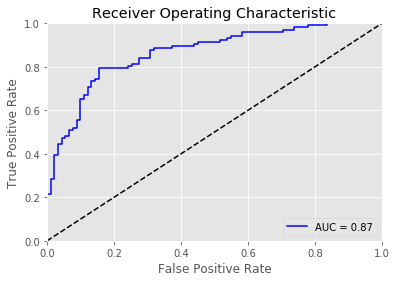

In [142]:
fpr, tpr, thresholds = roc_curve(mm_data_2017['team1_win'].values, mm_data_2017['preds'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [143]:
roc_auc_score(mm_data_2017['team1_win'].values, mm_data_2017['preds'].values)

0.86533278042712003

In [75]:
mm_data.to_csv('final.csv')